In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

### Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны: ###

https://data.oecd.org/natincome/gross-national-income.htm

In [267]:
count_gni = pd.read_clipboard()
count_gni.head()

,Australia,56 602.8
0,Austria,55 735.4
1,Belgium,53 758.7
2,Canada,45 537.1
3,Chile,23 301.9
4,Czech Republic,40 231.5


In [268]:
count_gni = count_gni.set_index(np.arange(1, len(count_gni)+1))
count_gni.rename(columns={'Australia':'Country','56 602.8':'GNI ($)'}, inplace=True)
count_gni.loc[0] = ['Australia', '56 602.8']
count_gni = count_gni.sort_values(by='Country')
count_gni['GNI ($)'] = count_gni['GNI ($)'].apply(lambda x: x.replace(' ',''))
count_gni['GNI ($)'] = count_gni['GNI ($)'].astype(float)
count_gni

,Country,GNI ($)
0,Australia,56602.8
1,Austria,55735.4
2,Belgium,53758.7
3,Canada,45537.1
4,Chile,23301.9
5,Czech Republic,40231.5
6,Denmark,62403.6
7,Euro area (19 countries),47255.7
8,"European Union (27 countries, 2020)",44807.4
9,Finland,51502.9


### Построить график корреляции между средним доходом (PPP) и ценой подписки### 


In [2]:
cost = pd.read_csv('https://docs.google.com/spreadsheets/d/1dQeWjcS1WSF4J2jdS_mvbmuQ7-sbn6zwkytl7qpOyzQ/export?gid=1012322044&format=csv')
cost

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48
62,us,United States,5818,3826,1992,8.99,13.99,17.99
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99


In [296]:
res = count_gni.merge(cost, on=['Country']) #inner join по столбцу с названием стран
res.head()

,Country,GNI ($),Country_code,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Australia,56602.8,au,6114,4050,2064,7.84,12.12,16.39
1,Austria,55735.4,at,5640,3779,1861,9.03,14.67,20.32
2,Belgium,53758.7,be,4990,3374,1616,10.16,15.24,20.32
3,Canada,45537.1,ca,6239,4311,1928,7.91,11.87,15.03
4,Chile,23301.9,cl,4994,3156,1838,7.07,9.91,12.74


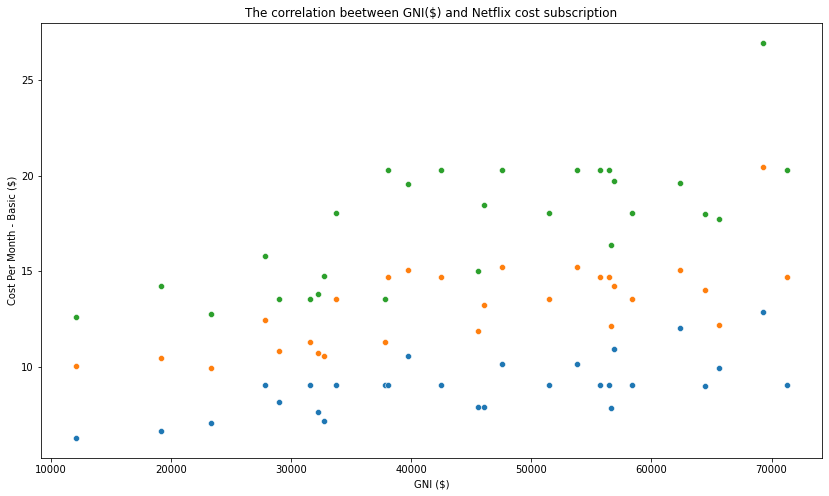

In [297]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
sb.scatterplot(data=res, x='GNI ($)', y='Cost Per Month - Basic ($)')
sb.scatterplot(data=res, x='GNI ($)', y='Cost Per Month - Standard ($)') 
sb.scatterplot(data=res, x='GNI ($)', y='Cost Per Month - Premium ($)')
ax.set_title('The correlation beetween GNI($) and Netflix сost subscription')
plt.show()

### Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны ###

Обработка датасета с Kaggle

Загружаем данные о стоимости подписки на Нетфликс в разных странах

In [289]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/export?gid=0&format=csv')
data

,Country,Basic,Currency,Unnamed: 3,Price USD,# of TV Shows,# of Movies,Total Library Size,Price per Title,Unnamed: 9,% Difference (Cost per Month) to Average,% Difference (Cost Per Month) to Most Expensive,% Difference (Cost Per Month) to Cheapest,% Difference (Cost per Title) to Average,% Difference (Cost per Title) to Most Expensive,% Difference (Cost per Title) to Cheapest
0,Turkey,26.99,TRY,USD,1.97,2930.0,1709.0,4639.0,0.00043,NaN,123.76,146.85,0.00,118.52,163.41,0.00
1,India,199.00,INR,USD,2.64,3718.0,2125.0,5843.0,0.00045,NaN,104.19,131.97,-28.87,114.56,161.37,-6.00
2,Argentina,379.00,ARS,USD,3.74,3154.0,1606.0,4760.0,0.00079,NaN,76.63,110.04,-61.77,71.72,137.32,-59.43
3,Colombia,16900.00,COP,USD,4.31,3156.0,1835.0,4991.0,0.00086,NaN,64.12,99.69,-74.39,63.26,132.11,-68.01
4,Brazil,25.90,BRL,USD,4.61,3162.0,1810.0,4972.0,0.00093,NaN,58.00,94.53,-80.14,56.77,127.99,-74.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Liechtenstein,11.90,CHF,USD,12.88,1712.0,1336.0,3048.0,0.00423,NaN,-42.33,0.00,-146.85,-87.03,0.00,-163.41
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Average,NaN,NaN,NaN,8.38,NaN,NaN,5314.0,0.00166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Minimum,NaN,NaN,NaN,1.97,NaN,NaN,2274.0,0.00043,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалим несодержательные строки - 'Minimum', 'Maximum', 'Average' - удалим эти строки из датасета по индексу. Далее поменяем индексацию на актульаную с помощью reset.

In [290]:
data.drop('Unnamed: 9', axis=1, inplace=True)
data = data[data['Country'].notna()]
data['Country'].unique()

array(['Turkey', 'India', 'Argentina', 'Colombia', 'Brazil', 'Ukraine',
       'South Africa', 'Hungary', 'Philippines', 'United Kingdom',
       'Czech Republic', 'Peru', 'Canada', 'Australia', 'Slovakia',
       'Mexico', 'Bulgaria', 'Ireland', 'Malaysia', 'Poland', 'Lithuania',
       'Estonia', 'Latvia', 'Iceland', 'Chile', 'Russia', 'New Zealand',
       'Gibraltar', 'Singapore', 'South Korea', 'Monaco', 'Germany',
       'Japan', 'Austria', 'Ecuador', 'Bolivia', 'Honduras', 'Venezuela',
       'Guatemala', 'Netherlands', 'Thailand', 'Romania', 'Hong Kong',
       'United States', 'Spain', 'Paraguay', 'Italy', 'Portugal',
       'Uruguay', 'Costa Rica', 'Israel', 'France', 'Greece', 'Taiwan',
       'Belgium', 'Indonesia', 'Norway', 'Finland', 'Moldova',
       'Switzerland', 'Sweden', 'Denmark', 'San Marino', 'Croatia',
       'Liechtenstein', 'Average', 'Minimum', 'Maximum'], dtype=object)

In [291]:
# data[data['Country'] == 'Maximum']
# data[data['Country'] == 'Minimum']
# data[data['Country'] == 'Average']

data = data.drop(index = [68])
data = data.drop(index = [67])
data = data.drop(index = [66])

Убедимся, что с данными теперь все в порядке: 

In [292]:
data = data.sort_values(by='Country')
data = data.reset_index(drop=True)
data

,Country,Basic,Currency,Unnamed: 3,Price USD,# of TV Shows,# of Movies,Total Library Size,Price per Title,% Difference (Cost per Month) to Average,% Difference (Cost Per Month) to Most Expensive,% Difference (Cost Per Month) to Cheapest,% Difference (Cost per Title) to Average,% Difference (Cost per Title) to Most Expensive,% Difference (Cost per Title) to Cheapest
0,Argentina,379.00,ARS,USD,3.74,3154.0,1606.0,4760.0,0.00079,76.63,110.04,-61.77,71.72,137.32,-59.43
1,Australia,10.99,AUD,USD,7.84,4050.0,2064.0,6114.0,0.00128,6.72,48.71,-119.52,25.92,106.92,-100.31
2,Austria,7.99,EUR,USD,9.03,3779.0,1861.0,5640.0,0.00160,-7.40,35.21,-128.22,3.87,90.14,-115.98
3,Belgium,8.99,EUR,USD,10.16,3374.0,1616.0,4990.0,0.00204,-19.13,23.68,-134.90,-20.10,69.99,-130.83
4,Bolivia,7.99,USD,USD,7.99,3155.0,1836.0,4991.0,0.00160,4.79,46.88,-120.76,3.84,90.12,-116.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Ukraine,4.99,EUR,USD,5.64,3261.0,2075.0,5336.0,0.00106,39.16,78.25,-96.26,44.64,120.02,-85.15
61,United Kingdom,5.99,GBP,USD,7.91,4551.0,2092.0,6643.0,0.00119,5.74,47.78,-120.15,33.07,112.04,-94.73
62,United States,9.99,USD,USD,9.99,3826.0,1992.0,5818.0,0.00172,-17.50,25.30,-134.00,-3.17,84.44,-120.56
63,Uruguay,8.99,USD,USD,8.99,3154.0,1835.0,4989.0,0.00180,-7.00,35.60,-127.98,-7.99,80.44,-123.59


In [301]:
mean_by_currency = cost.merge(data, on = ['Country'])
mean_by_currency = mean_by_currency[['Currency','Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)','Cost Per Month - Premium ($)' ]]
mean_by_currency 

,Currency,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ARS,3.74,6.30,9.26
1,AUD,7.84,12.12,16.39
2,EUR,9.03,14.67,20.32
3,EUR,10.16,15.24,20.32
4,USD,7.99,10.99,13.99
...,...,...,...,...
59,EUR,5.64,8.46,11.29
60,GBP,7.91,13.20,18.48
61,USD,8.99,13.99,17.99
62,USD,8.99,12.99,15.99


### Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента

https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita

In [26]:
countinent_gni = pd.read_clipboard()
countinent_gni['Country'] = countinent_gni['Country'].apply(lambda x: x.replace('*',''))
countinent_gni['Country'] = countinent_gni['Country'].str.strip()
countinent_gni

,Country,Subregion,Continent,GNI ($),year
0,Liechtenstein,Western Europe,Europe,"139,1",2009.0
1,Luxembourg,Western Europe,Europe,"114,482",2019.0
2,Monaco,Western Europe,Europe,"115,7",2015.0
3,Singapore,South-eastern Asia,Asia,"97,341",2019.0
4,Ireland,Northern Europe,Europe,"86,781",2019.0
...,...,...,...,...,...
223,Malawi,Eastern Africa,Africa,"1,06",2019.0
224,DR Congo,Middle Africa,Africa,"1,098",2019.0
225,Central African Republic,Middle Africa,Africa,945,2019.0
226,Somalia,Eastern Africa,Africa,NaN,NaN


In [29]:
cost_countries = cost[['Country','Cost Per Month - Basic ($)','Cost Per Month - Standard ($)','Cost Per Month - Premium ($)']]
cost_countries = cost_countries.join(countinent_gni.set_index('Country'), on='Country')
cost_countries.drop('year', axis = 1, inplace = True)
cost_countries.head()

,Country,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Subregion,Continent,GNI ($)
0,Argentina,3.74,6.30,9.26,South America,Americas,"22,064"
1,Australia,7.84,12.12,16.39,"Australia, New Zealand",Oceania,"49,854"
2,Austria,9.03,14.67,20.32,Western Europe,Europe,"56,188"
3,Belgium,10.16,15.24,20.32,Western Europe,Europe,"51,934"
4,Bolivia,7.99,10.99,13.99,South America,Americas,"8,724"


In [30]:
cost_countries.groupby('Continent').mean()

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Continent,,,
Africa,6.260000,10.050000,12.580000
Americas,7.223750,10.465625,13.548750
Asia,7.636667,10.404167,12.966667
Europe,9.242424,13.359394,17.648485
Oceania,8.320000,12.325000,16.665000


### Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?

In [369]:
cost.loc[
    cost.loc[:, 'Country'] == 'Czechia', ['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']
].applymap(lambda x: x /count_gni.loc[count_gni.loc[:, 'Country'] == 'Czech Republic', 'GNI ($)'].values[0])

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
12,0.000219,0.000286,0.000352


### Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

In [386]:
coll_series = data[['Country', '# of TV Shows']]
coll_series = coll_series.sort_values(by = '# of TV Shows').head(5)
coll_series = coll_series.set_index(np.arange(1, len(coll_series)+1))
coll_series

,Country,# of TV Shows
1,Croatia,1675.0
2,Liechtenstein,1712.0
3,San Marino,1937.0
4,Indonesia,2449.0
5,Moldova,2473.0


### Какой процент среднего дохода россиянина будет составлять подписка Netflix?

In [388]:
cost.loc[
    cost.loc[:, 'Country'] == 'Russia', ['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']
].applymap(lambda x: 100* x /count_gni.loc[count_gni.loc[:, 'Country'] == 'Russia', 'GNI ($)'].values[0])

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
48,0.028053,0.037404,0.046789


### На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)

In [440]:
data_sort_prt = data.sort_values(by = 'Price per Title')
data_sort_prt = data_sort_prt.set_index(np.arange(1, len(data_sort_prt)+1))
data_sort_prt[data_sort_prt['Country'] == "Russia"]

,Country,Basic,Currency,Unnamed: 3,Price USD,# of TV Shows,# of Movies,Total Library Size,Price per Title,% Difference (Cost per Month) to Average,% Difference (Cost Per Month) to Most Expensive,% Difference (Cost Per Month) to Cheapest,% Difference (Cost per Title) to Average,% Difference (Cost per Title) to Most Expensive,% Difference (Cost per Title) to Cheapest
26,Russia,599.0,RUB,USD,8.13,3624.0,2087.0,5711.0,0.00142,3.08,45.26,-121.84,15.56,99.24,-107.94


### В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

In [441]:
cheapest_sub = cost.sort_values(by = 'Cost Per Month - Basic ($)', ascending = True )
cheapest_sub = cheapest_sub.set_index(np.arange(1, len(cheapest_sub)+1))
cheapest_sub.head(1)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
1,tr,Turkey,4639,2930,1709,1.97,3.0,4.02
